In [2]:
#import all my packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

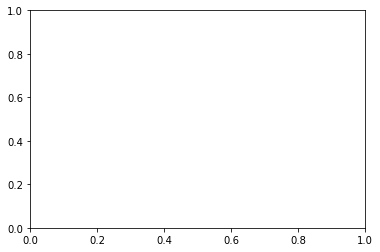

In [3]:
#inital graph work cleared
%matplotlib inline
fig,ax = plt.subplots()
plt.show()

In [4]:
#check and assign my working directory
os.getcwd()
os.chdir(r'C:\Users\35386\OneDrive\Desktop\UCD - DATA ANALYTICS\Assessment\Raw Data\Data Test')
os.getcwd()

'C:\\Users\\35386\\OneDrive\\Desktop\\UCD - DATA ANALYTICS\\Assessment\\Raw Data\\Data Test'

In [5]:
#import datasets, name as raw.
Episodes_Raw = pd.read_csv("brooklyn99_episodes.csv")

In [6]:
#intial summary of data - column names
Episodes_Raw.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0


In [7]:
#summary of data - shape
Episodes_Raw.shape

(153, 9)

In [8]:
#summary of data - type of each column
Episodes_Raw.dtypes

season                     int64
episode_num_in_season      int64
episode_num_overall        int64
title                     object
directed_by               object
written_by                object
original_air_date         object
prod_code                float64
us_viewers               float64
dtype: object

In [9]:
#summary of data - are the null values
Episodes_Raw.isnull().sum()

season                   0
episode_num_in_season    0
episode_num_overall      0
title                    0
directed_by              0
written_by               0
original_air_date        0
prod_code                0
us_viewers               0
dtype: int64

In [10]:
#We will be comparing seasons, so it is relevant to look at the size of each season, to see if they are comparable
Episodes_Raw.groupby(['season']).count()['episode_num_in_season']

season
1    22
2    23
3    23
4    22
5    22
6    18
7    13
8    10
Name: episode_num_in_season, dtype: int64

In [11]:
#import second dataset
IMDB_Raw = pd.read_csv("brooklyn99_imdb.csv")

In [12]:
#intial summary of data - column names
IMDB_Raw.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,17 Sep. 2013,7.8,4678,Detective Jake Peralta finds his work scrutini...
1,1,2,The Tagger,24 Sep. 2013,7.5,3818,"When Jake arrives late for work, Captain Holt ..."
2,1,3,The Slump,1 Oct. 2013,7.6,3576,"With a backlog of unsolved cases, Jake finds h..."
3,1,4,M.E. Time,8 Oct. 2013,7.7,3458,"Jake meets an attractive Medical Examiner, but..."
4,1,5,The Vulture,15 Oct. 2013,8.0,3353,A detective from Major Crimes takes over Jake'...


In [13]:
#summary of data - shape
IMDB_Raw.shape

(153, 7)

In [14]:
#summary of data - type of each column
IMDB_Raw.dtypes

season                 int64
episode_num            int64
title                 object
original_air_date     object
imdb_rating          float64
total_votes            int64
desc                  object
dtype: object

In [15]:
#summary of data - are the null values
Episodes_Raw.isnull().sum()

season                   0
episode_num_in_season    0
episode_num_overall      0
title                    0
directed_by              0
written_by               0
original_air_date        0
prod_code                0
us_viewers               0
dtype: int64

In [16]:
#joining both tables into one, based on the indexed values
Total_Data_Combine = pd.merge(IMDB_Raw,Episodes_Raw, left_index=True, right_index=True)
Total_Data_Combine.head()

,season_x,episode_num,title_x,original_air_date_x,imdb_rating,total_votes,desc,season_y,episode_num_in_season,episode_num_overall,title_y,directed_by,written_by,original_air_date_y,prod_code,us_viewers
0,1,1,Pilot,17 Sep. 2013,7.8,4678,Detective Jake Peralta finds his work scrutini...,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,1,2,The Tagger,24 Sep. 2013,7.5,3818,"When Jake arrives late for work, Captain Holt ...",1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,1,3,The Slump,1 Oct. 2013,7.6,3576,"With a backlog of unsolved cases, Jake finds h...",1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,1,4,M.E. Time,8 Oct. 2013,7.7,3458,"Jake meets an attractive Medical Examiner, but...",1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,1,5,The Vulture,15 Oct. 2013,8.0,3353,A detective from Major Crimes takes over Jake'...,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0


In [17]:
# The original shape of each table was 153*9, 153*7, meaning there are some duplicate columns, but whats present should be useful for our purposes
Total_Data_Combine.shape

(153, 16)

In [18]:
# I will now check if to see if there are any nulls
print(Total_Data_Combine.isna().sum())

season_x                 0
episode_num              0
title_x                  0
original_air_date_x      0
imdb_rating              0
total_votes              0
desc                     0
season_y                 0
episode_num_in_season    0
episode_num_overall      0
title_y                  0
directed_by              0
written_by               0
original_air_date_y      0
prod_code                0
us_viewers               0
dtype: int64


In [19]:
#thankfully the dataset is complete, but to illustrate how I would deal with null values, I will code as if there are

In [20]:
# I will be looking at the "directed_by" column. These are obviously strings, so it is easiest to replace them with a unique character, and if not a large proportion possibly ignored
Total_Data_Combine["written_by"],["directed_by"].fillna("AAA", inplace = True)

AttributeError: 'list' object has no attribute 'fillna'

In [21]:
#We will be comparing seasons later on, so it is relevant to look at the size of each season, to see if they are comparable
Episodes_Raw.groupby(['season']).count()['episode_num_in_season']

season
1    22
2    23
3    23
4    22
5    22
6    18
7    13
8    10
Name: episode_num_in_season, dtype: int64

In [22]:
#There are a lot of duplicate columns, I will delete them so the table is clearer
Data_Combine = Total_Data_Combine.drop(Total_Data_Combine.columns[[0,1,2,3,6]], axis=1)
print(Data_Combine.shape)
Data_Combine.head()

(153, 11)


,imdb_rating,total_votes,season_y,episode_num_in_season,episode_num_overall,title_y,directed_by,written_by,original_air_date_y,prod_code,us_viewers
0,7.8,4678,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,7.5,3818,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,7.6,3576,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,7.7,3458,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,8.0,3353,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0


In [23]:
Data_Combine.tail()

,imdb_rating,total_votes,season_y,episode_num_in_season,episode_num_overall,title_y,directed_by,written_by,original_air_date_y,prod_code,us_viewers
148,6.8,1489,8,6,149,The Set Up,Maggie Carey,Jess Dweck & Nick Perdue,2021-08-26,805.0,1450000.0
149,8.1,1244,8,7,150,Game of Boyles,Thembi Banks,Paul Welsh & Madeline Walter,2021-09-02,806.0,1840000.0
150,8.2,1178,8,8,151,Renewal,Beth McCarthy Miller,Stephanie A. Ritter & Beau Rawlins,2021-09-02,807.0,1310000.0
151,9.4,2088,8,9,152,The Last Day Pt 1,Linda Mendoza,Luke Del Tredici & Audrey E. Goodman,2021-09-16,809.0,1880000.0
152,9.6,2636,8,10,153,The Last Day Pt 2,Claire Scanlon,Dan Goor,2021-09-16,810.0,1880000.0


In [64]:
## Some of the main cast have directed an episode. 
#In order to see if these episodes were well received, I will first check to see
#if that actor directed. My samples are Melissa Fumero, Joe Lo Truglio, and Stephanie Beatriz 
# In order to see if these episodes were well received, 
#I will create a code, whereby the actors name can be inputted, 
# and the views of their episode and the average of that season are printed
def my_func(a):
    print(Data_Combine[Data_Combine.isin([a])].dropna(how='all').count)
    print(round(Data_Combine.groupby('season_y')['us_viewers'].mean()))
    print("There were" , Data_Combine.loc[Data_Combine['directed_by'] == a, 'us_viewers'].iloc[0], "views in this episode in the US")
    print("This Actor Directed in Season" ,Data_Combine.loc[Data_Combine['directed_by'] == a, 'season_y'].iloc[0])
    print("")
    print(Data_Combine.groupby('season_y')['imdb_rating'].mean())
    print("This episode was rated " , Data_Combine.loc[Data_Combine['directed_by'] == a, 'imdb_rating'].iloc[0])
        
my_func('Melissa Fumero')

<bound method DataFrame.count of      imdb_rating  total_votes  season_y  episode_num_in_season  \
126          NaN          NaN       NaN                    NaN   

     episode_num_overall title_y     directed_by written_by  \
126                  NaN     NaN  Melissa Fumero        NaN   

    original_air_date_y  prod_code  us_viewers  
126                 NaN        NaN         NaN  >
season_y
1    3978182.0
2    3538261.0
3    2733043.0
4    2109545.0
5    1759091.0
6    2240556.0
7    2063077.0
8    1695000.0
Name: us_viewers, dtype: float64
There were 1650000.0 views in this episode in the US
This Actor Directed in Season 6

season_y
1    8.040909
2    8.126087
3    8.095652
4    8.177273
5    8.322727
6    8.050000
7    8.307692
8    7.760000
Name: imdb_rating, dtype: float64
This episode was rated  6.4


In [65]:
# Some of the main cast have directed an episode. 
#In order to see if these episodes were well received, I will first check to see
#if that actor directed. My samples are Melissa Fumero, Joe Lo Truglio, and Stephanie Beatriz
my_func('Joe Lo Truglio')

<bound method DataFrame.count of      imdb_rating  total_votes  season_y  episode_num_in_season  \
124          NaN          NaN       NaN                    NaN   

     episode_num_overall title_y     directed_by written_by  \
124                  NaN     NaN  Joe Lo Truglio        NaN   

    original_air_date_y  prod_code  us_viewers  
124                 NaN        NaN         NaN  >
season_y
1    3978182.0
2    3538261.0
3    2733043.0
4    2109545.0
5    1759091.0
6    2240556.0
7    2063077.0
8    1695000.0
Name: us_viewers, dtype: float64
There were 1780000.0 views in this episode in the US
This Actor Directed in Season 6

season_y
1    8.040909
2    8.126087
3    8.095652
4    8.177273
5    8.322727
6    8.050000
7    8.307692
8    7.760000
Name: imdb_rating, dtype: float64
This episode was rated  7.9


In [66]:
# Some of the main cast have directed an episode. 
#In order to see if these episodes were well received, I will first check to see
#if that actor directed. My samples are Melissa Fumero, Joe Lo Truglio, and Stephanie Beatriz
my_func('Stephanie Beatriz')

<bound method DataFrame.count of      imdb_rating  total_votes  season_y  episode_num_in_season  \
119          NaN          NaN       NaN                    NaN   

     episode_num_overall title_y        directed_by written_by  \
119                  NaN     NaN  Stephanie Beatriz        NaN   

    original_air_date_y  prod_code  us_viewers  
119                 NaN        NaN         NaN  >
season_y
1    3978182.0
2    3538261.0
3    2733043.0
4    2109545.0
5    1759091.0
6    2240556.0
7    2063077.0
8    1695000.0
Name: us_viewers, dtype: float64
There were 2360000.0 views in this episode in the US
This Actor Directed in Season 6

season_y
1    8.040909
2    8.126087
3    8.095652
4    8.177273
5    8.322727
6    8.050000
7    8.307692
8    7.760000
Name: imdb_rating, dtype: float64
This episode was rated  7.0


In [27]:
# The show was cancelled after its 5th season by FOX, but almost immediatelly 
# it was picked up by NBC. I will see if this was justified by Fox, or by NBC

#Create a list of the average season
Season_Views = (round(Data_Combine.groupby('season_y')['us_viewers'].mean()))

In [28]:
print(Season_Views)

season_y
1    3978182.0
2    3538261.0
3    2733043.0
4    2109545.0
5    1759091.0
6    2240556.0
7    2063077.0
8    1695000.0
Name: us_viewers, dtype: float64


In [29]:
#Convert this list to a numpy array to work with
Season_Views_numpy = Season_Views.to_numpy()

In [30]:
print(Season_Views_numpy)

[3978182. 3538261. 2733043. 2109545. 1759091. 2240556. 2063077. 1695000.]


In [60]:
#Check to see how many of the seasons had higher views that season 5
round(np.count_nonzero(Season_Views_numpy > Season_Views_numpy[4])/7*100,0)

86.0

In [61]:
#Check to see how many of the seasons had higher views that season 6
round(np.count_nonzero(Season_Views_numpy > Season_Views_numpy[5])/7*100,0)

43.0

In [62]:
#Check to see how many of the seasons had higher views that season 7
round(np.count_nonzero(Season_Views_numpy > Season_Views_numpy[6])/7*100,0)

71.0

In [63]:
#Check to see how many of the seasons had higher views that season 8
round(np.count_nonzero(Season_Views_numpy > Season_Views_numpy[-1])/7*100,0)

100.0

[Text(0.5, 1.0, 'Progression of Viewers')]

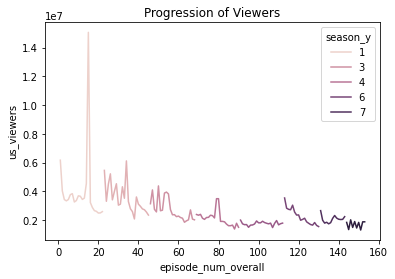

In [41]:
#I will start my insights by getting a feel for the reception of the show over the seasons
sns.lineplot(data=Data_Combine, x="episode_num_overall", y="us_viewers", hue="season_y").set(title='Progression of Viewers')

[Text(0.5, 1.0, 'Engagement of Viewers')]

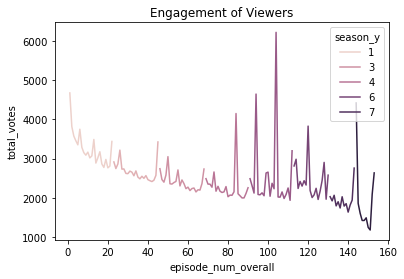

In [44]:
#I will start my insights by getting a feel for the reception of the show over the seasons
sns.lineplot(data=Data_Combine, x="episode_num_overall", y="total_votes", hue="season_y").set(title='Engagement of Viewers')

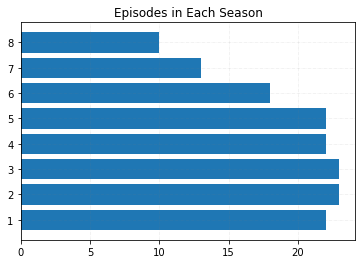

In [38]:
#horizontal barplot to see the length of each season
plt.barh(y=Data_Combine.season_y, width=Data_Combine.episode_num_in_season)
plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
plt.title('Episodes in Each Season')
plt.show()

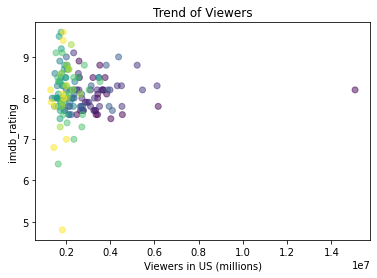

In [37]:
plt.scatter( x=Data_Combine.us_viewers, y=Data_Combine.imdb_rating, c=Data_Combine.season_y, alpha=0.5)
plt.title("Trend of Viewers")
plt.xlabel("Viewers in US (millions)")
plt.ylabel("imdb_rating")
plt.show()